# **Bharat Intern  Data Science Internship Task-2**


---


* Created Date:16.03.2024
* Created By: Blessy Louis
* edited on:16.03.2024

# **AIM:**
Build a predictive model to determine the
likelihood of survival for passengers on
the Titanic using data science techniques
in Python.



Importing Packages/libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

Dataset import

In [4]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data cleaning and feature selection

In [5]:
features = ['Pclass', 'Age', 'Sex']
X = df[features]
y = df['Survived']

Convert 'Sex' to numerical using Label Encoding

In [6]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

<ipython-input-6-e241ddf2f1df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handle missing values using imputation

In [8]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Ensure the indices match after imputation
X_train_imputed.index = X_train.index
X_test_imputed.index = X_test.index

# Ensure the number of samples in X_train_imputed and y_train match
min_samples = min(X_train_imputed.shape[0], y_train.shape[0])
X_train_imputed = X_train_imputed.iloc[:min_samples, :]
y_train = y_train.iloc[:min_samples]

In [9]:
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)

X_train_imputed shape: (712, 3)
y_train shape: (712,)


In [10]:
# Print the number of samples before training the model
print("Number of samples in X_train_imputed:", len(X_train_imputed))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train_imputed: 712
Number of samples in y_train: 712


Choose a machine learning model (Logistic Regression)

In [11]:
model = LogisticRegression()

Train Model

In [13]:
model.fit(X_train_imputed, y_train)

LogisticRegression()

Make predictions on the test set

In [14]:
# Make predictions on the correct test set
probabilities = model.predict_proba(X_test_imputed)[:, 1]
predictions = (probabilities >= 0.5).astype(int)


In [15]:
print("Shape of X_test_imputed:", X_test_imputed.shape)
print("X_test_imputed head:\n", X_test_imputed.head())
print("y_test head:\n", y_test.head())
print("X_test_imputed head:\n", X_test_imputed.head())
print("y_test head:\n", y_test.head())
print("Shape of predictions:", predictions.shape)

Shape of X_test_imputed: (179, 3)
X_test_imputed head:
      Pclass        Age  Sex
709     3.0  29.498846  1.0
439     2.0  31.000000  1.0
840     3.0  20.000000  1.0
720     2.0   6.000000  0.0
39      3.0  14.000000  0.0
y_test head:
 709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64
X_test_imputed head:
      Pclass        Age  Sex
709     3.0  29.498846  1.0
439     2.0  31.000000  1.0
840     3.0  20.000000  1.0
720     2.0   6.000000  0.0
39      3.0  14.000000  0.0
y_test head:
 709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64
Shape of predictions: (179,)


In [16]:
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)

Shape of y_test: (179,)
Shape of predictions: (179,)


Evaluate the model

In [17]:
accuracy = accuracy_score(y_test.iloc[:predictions.shape[0]], predictions)

print(f"Accuracy: {accuracy}")
# Calculate classification report using the matching number of samples
print("Classification Report:\n", classification_report(y_test.iloc[:predictions.shape[0]], predictions))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Confusion Matrix

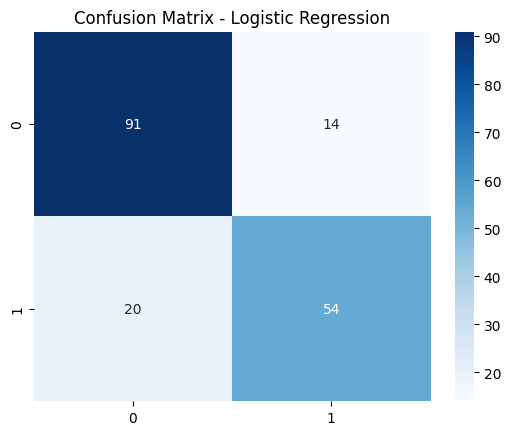

In [18]:
cm = confusion_matrix(y_test.iloc[:predictions.shape[0]], predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

ROC curve

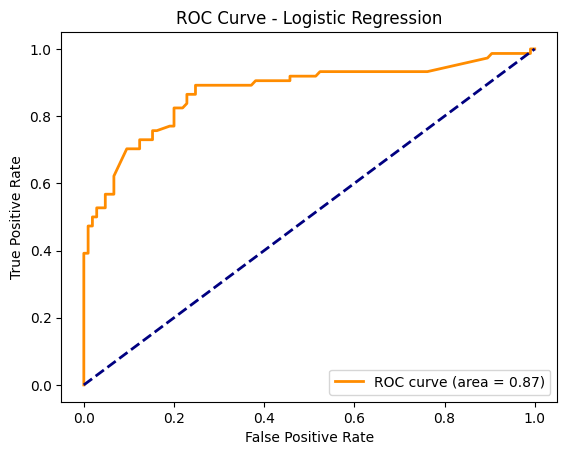

In [19]:
fpr, tpr, thresholds = roc_curve(y_test.iloc[:predictions.shape[0]], model.predict_proba(X_test_imputed)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Bar chart comparing actual vs predicted survival outcomes

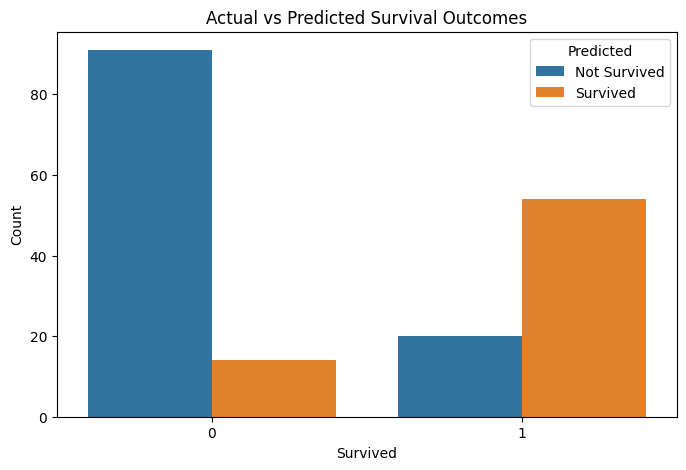

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Predicted', data=pd.DataFrame({'Survived': y_test.iloc[:predictions.shape[0]], 'Predicted': predictions}))
plt.title('Actual vs Predicted Survival Outcomes')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

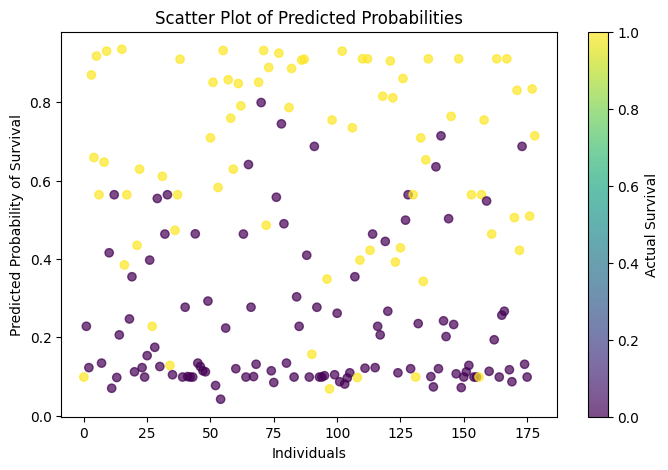

In [22]:
# Scatter plot of predicted probabilities
plt.figure(figsize=(8, 5))
plt.scatter(range(len(probabilities)), probabilities, c=y_test.iloc[:predictions.shape[0]], cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Predicted Probabilities')
plt.xlabel('Individuals')
plt.ylabel('Predicted Probability of Survival')
plt.colorbar(label='Actual Survival')
plt.show()

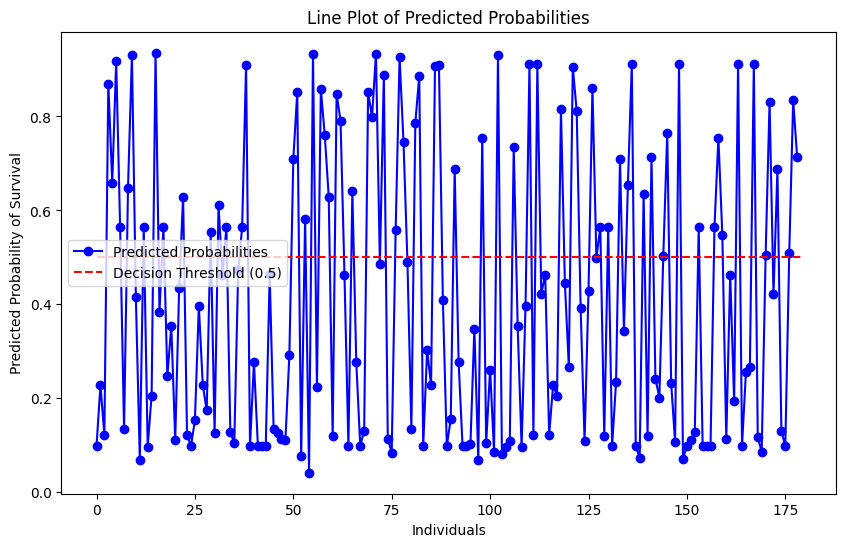

In [23]:
# Line plot of predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(range(len(probabilities)), probabilities, marker='o', linestyle='-', color='b', label='Predicted Probabilities')
plt.hlines(0.5, 0, len(probabilities), colors='r', linestyles='dashed', label='Decision Threshold (0.5)')
plt.title('Line Plot of Predicted Probabilities')
plt.xlabel('Individuals')
plt.ylabel('Predicted Probability of Survival')
plt.legend()
plt.show()